### <p style="text-align: right;"> &#9989; Daniel Goodman.</p>

# Homework Assignment #3 (Individual)
## Simulating animal populations using OOP and ABM 

<img src="http://worth1000.s3.amazonaws.com/submissions/12027500/12027970_5e94_1024x2000.jpg" width=300px align='left'  style="margin-right: 20px" >

## WOLFY against SHEEPY

### Goal for this homework assignment
By now, you have learned OOP and ABM through the assignments of assembling Zoo and Superbugs, respectively. Let us use what you learned to build a simple model of population competition between prey and predator. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 12.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.

**After the sheep and wolf objects are properly built, you should be able to see the sheep and wolf roaming and change of their populations like the video at the link.**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("wFxDKmgskDg",width=600,height=450)

**At the end of the assignment, if everything went as intended, you should have a population evolution plot like the one below.** 

<img src="https://i.ibb.co/jw1hTBJ/Popula-1.jpg" alt="Popula-1" border="0" width=300px>

This plot and the previous video, should help you to determine if your code is headed in the right direction!

---
## Part 1: Add to your Git repository to track your progress on your assignment (5 points)

As usual, for this assignment, you're going to add it to the `cmse202-s21-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s21-turnin` repository and create a new directory called `hw-03`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s21-turnin`" repository inside the `hw-03` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

**Do this**: Before you move on, put the command that your instructor should run to clone your repository in the empty cell below.

In [ ]:
# Put the command for cloning your repository here!

!git clone https://github.com/goodm215/cmse202-s21-turnin

---
## Part 2: Load necessary modules

Execute the next two Code cells to load python packages for math and visualization functions.

In [2]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output

The Code cell below is found online, which allows scatter plot using image as the markers.
#### Do not forget to download the image files of Wolfy.ipg and Sheepy.ipg

In [3]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

---
## Part 3: Problem Statement

You are creating a simple ecosystem containing only two types of animals on the computer.  

1. **On a prairie, there are sheeps and wolves.** ==> You will create sheep and wolf objects.
1. **Sheeps and wolves roam around.** ==> Both objetcs will have a method of roaming. 
1. **The animals reproduce.** ==> Both objectcs will have a method of reproduce/duplicate over a given period. 
1. **Let's set a boundary of the prairie.** ==> The prairie domain is $20 <x < 100$ and $20 < y < 120$.
1. **Note here** your main tasks are creating sheep and wolf objects. The code to verify the created classes and run simulations is already functioning. No need to modify them. You are encouraged to take a look of those code to ensure your objects will be compatible with them before you create the objects.


You will need a copy of the following sheep and wolf images to visualize your results for this problem, you should be able to download them using the links that are being used to embed them in this notebook!

<img src="https://i.ibb.co/RTtMDVz/sheepy.jpg" alt="sheepy" border="0">
<img src="https://i.ibb.co/NSNtQmt/wolfy.jpg" alt="wolfy" border="0">

---
## Part 3.1 Sheep object (25 pt)
**Step by step. Let's start with creating a `sheep` object.** The object should contain the attributes of
- Position: in the 2D case it can be `x` and `y`. For simplicity, we will set the grid (positions) on the 2D plane only on integer points; for example, (35, 72), (24, 67), (43, 82), etc.
- Initial position: you need to give an initial position when this object is created. Use random integer number generator to assignment the initial position. **Don't forget that the position needs to be limited within the prairie:** $20 <x < 100$ **and** $20 < y < 120$.
- **Important**: Add Docstring to explain your code. Without any Docstring, **your score will be compromized**. 
- Add a method for drawing to your sheep object. The example code is provided in the cell below. It is important that you make sure this method is called `draw()`.

In [1]:
### example code for drawing. Add this to you sheep object. 
### Not meant to be excuted in this cell.

    def draw(self):
        image_path = 'sheepy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)

IndentationError: unexpected indent (<ipython-input-1-baf17981da7c>, line 4)

- **Create a sheep object in the cell below** which has an initial position and can be drawn .

In [4]:
### put your code of creating sheep object in this cell (5 pt)

class sheep():
    ## DocString
    """
    Attributes: X and Y coordinate
    Functions: Roam, Reproduce
    Dependencies: Numpy
    """
    
    
    __slots__ = ['x', 'y']
    
    def __init__(self, x = None, y = None):
        """
        Create sheep object and randomly assign x and y if no value passed
        """
        
        self.x = x
        self.y = y
        
        if not x:
            self.x = np.random.randint(20, 101)
        if not y:
            self.y = np.random.randint(20, 101)
    
    
    ## methods
    
    def roam(self):
        """
        Randomly move sheep 1 or 0 units in both the X and Y direction
        """
        x_move = np.random.randint(-1, 2)
        y_move = np.random.randint(-1, 2)
        
        #update x and y and ensure the sheep stays in bounds
        self.x = min(100, max(20, (self.x + x_move)))
        self.y = min(100, max(20, (self.y + y_move)))
        
    def draw(self):
        """
        draw sheep object on pyplot
        """
        image_path = 'sheepy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)      

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "version 1 of sheep", and push the changes to GitHub.

---

- Initialize your sheep object.

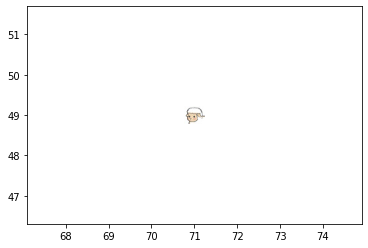

In [5]:
### initialize a sheep and draw it

sp = sheep()
sp.draw()

---
- Roaming: You need to add a method of roaming to your sheep object.
- The sheep should take a random step when the `roaming()` method is called. It will move by either -1, 0, or 1 in both x and y directions. Again, you can use random integer number generator to generator the step and update the sheep position. See the image below to get a concept of roaming.

<img src="https://i.ibb.co/09nrzbb/Moving-Step.jpg" alt="Moving-Step" border="0" width=500px>

- Here we will set up an invisible fence to confine the sheep from lost. The sheep cannot go outside the range of $20 < x < 100$ and $20 < y < 120$. You probably need several if-loops to prevent the sheep from going outside the prairie. For example,

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "blue">if s_x < 20: </font><br>
&nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"> s_x = 20</font>
</div>

- Copy your sheep object to the cell below and add a method of roaming.

In [6]:
### copy your sheep object here and add roaming function (10 pt)

class sheep():
    ## DocString
    """
    Attributes: X and Y coordinate
    Functions: Roam, Reproduce
    Dependencies: Numpy
    """
    
    
    __slots__ = ['x', 'y']
    
    def __init__(self, x = None, y = None):
        """
        Create sheep object and randomly assign x and y if no value passed
        """
        
        self.x = x
        self.y = y
        
        if not x:
            self.x = np.random.randint(20, 101)
        if not y:
            self.y = np.random.randint(20, 101)
    
    
    ## methods
    
    def roaming(self):
        """
        Randomly move sheep 1 or 0 units in both the X and Y direction
        """
        x_move = np.random.randint(-1, 2)
        y_move = np.random.randint(-1, 2)
        
        #update x and y and ensure the sheep stays in bounds
        self.x = min(100, max(20, (self.x + x_move)))
        self.y = min(100, max(20, (self.y + y_move)))
        
    def draw(self):
        """
        draw sheep object on pyplot
        """
        image_path = 'sheepy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)      

- Initialize your new sheep object
- Test to see whether it roams in the cell below.

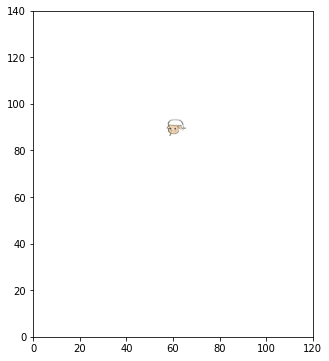

In [7]:
### run your roaming method 40 times

## initialize sheep
sp = sheep()

## iterate over 40 time steps
for d in range(40):
  
    ## the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    

    
    ## call the roaming method and then draw here  
    sp.roaming()
    sp.draw()
    
    
    ## the next 5 lines are for plotting
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)       
    

- Up to now, you should be able to see a sheep randomly walks on the prairie.
- Next, you want to add a method for the sheep to reproduce. When this method is called, a new sheep is created from the old one. Call this method `reproduce()`.
- Copy your sheep object to the cell below and add a method of reproduce.

---
### <font color='blue'>This one will be the final functioning sheep class.</font>


In [8]:
### copy your sheep object here and add reproduce function (5 pt)


class sheep():
    ## DocString
    """
    Attributes: X and Y coordinate
    Functions: Roam, Reproduce
    Dependencies: Numpy
    """
    
    
    __slots__ = ['x', 'y']
    
    def __init__(self, x = None, y = None):
        """
        Create sheep object and randomly assign x and y if no value passed
        """
        
        self.x = x
        self.y = y
        
        if not x:
            self.x = np.random.randint(20, 101)
        if not y:
            self.y = np.random.randint(20, 101)
    
    
    ## methods
    
    def roaming(self):
        """
        Randomly move sheep 1 or 0 units in both the X and Y direction
        """
        x_move = np.random.randint(-1, 2)
        y_move = np.random.randint(-1, 2)
        
        #update x and y and ensure the sheep stays in bounds
        self.x = min(100, max(20, (self.x + x_move)))
        self.y = min(100, max(20, (self.y + y_move)))
        
    def draw(self):
        """
        draw sheep object on pyplot
        """
        image_path = 'sheepy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        
    def reproduce(self):
        """
        :returns: a new sheep object with the same x,y coords as self
        """
        return sheep(self.x, self.y)

- Initialize the new sheep
- Test to see whether the sheep reproduce.

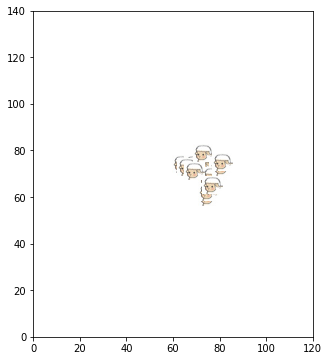

In [9]:
### in this cell, run your roaming methoid 40 times

## initialize your sheep
sp = sheep()

## create an empty list of flock
flock = []

## add sheep to the flock
flock.append(sp)

## iterate over 40 time steps
for d in range(40):
  
    ## the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    

    
    ## call the roaming method and then draw  
    for s in range(np.size(flock)):
        flock[s].roaming()
        flock[s].draw()
        
     
    ## call the reproduce method every 10 time steps
    ## Here we assume sheep reproduce every 10 days
    if np.mod(d,10) == 1:
        ## call the reproduce method here
        for i in range(np.size(flock)):
            kid = flock[i].reproduce()
            flock.append(kid)

    
    ## the next 5 lines are for plotting
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)  

**How many sheeps at the end?**
put the number of sheep in the cell below. (5 pt)

16

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Final version of sheep", and push the changes to GitHub.

---

---
## Part 3.2 Wolf object (30 pt)
**Create a `wolf` object.** The object should contain the same attributes (`x` and `y` position) and methods (`draw`, `roaming`, and `reproduce`) as the sheep.
- **Important**: Add Docstring to explain your code. Otherwise, your score will be compromised. 
- **Replace the image_path with `wolfy.jpg`** in the draw function.
- **Again, wolf can only roams inside the prairie.** Do not forget to prevent the wolf from roaming outside the prairie.
- **Important, wolf moves twice fast.** Thus, in the roaming( ) method, you need to set $dx$ is either -2, -1, 0, 1, 2, and $dy$ is either -2, -1, 0, 1, 2.

In [11]:
### create wolf object in this cell (5 pt)

class wolf():
    ## DocString
    """
    Attributes: X and Y coordinate
    Functions: Roam, Reproduce
    Dependencies: Numpy
    """
    
    
    __slots__ = ['x', 'y']
    
    def __init__(self, x = None, y = None):
        """
        Create wolf object and randomly assign x and y if no value passed
        """
        
        self.x = x
        self.y = y
        
        if not x:
            self.x = np.random.randint(20, 101)
        if not y:
            self.y = np.random.randint(20, 101)
    
    
    ## methods
    
    def roaming(self):
        """
        Randomly move wolf 1, 2, or 0 units in both the X and Y direction
        """
        x_move = np.random.randint(-2, 3)
        y_move = np.random.randint(-2, 3)
        
        #update x and y and ensure the wolf stays in bounds
        self.x = min(100, max(20, (self.x + x_move)))
        self.y = min(100, max(20, (self.y + y_move)))
        
    def draw(self):
        """
        draw wolf object on pyplot
        """
        image_path = 'wolfy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        
    def reproduce(self):
        """
        :returns: a new wolf object with the same x,y coords as self
        """
        return wolf(self.x, self.y)


- **Test your wolf object in the cell below.**

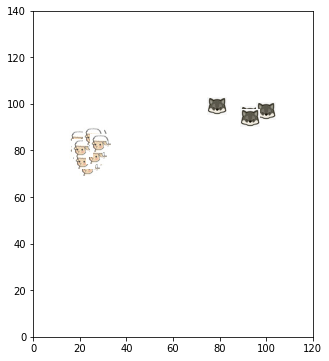

In [12]:
### in this cell, run your roaming methoid 40 times

## initialize your sheep
sp = sheep()

## create an empty list of flock
flock = []

## add sheep to the flock
flock.append(sp)

## initialize your wolf
wf = wolf()

## create an empty list of pack
pack = []

## add wolf to the pack
pack.append(wf)


## iterate over 40 time steps
for d in range(40):
  
    ## the next 2 lines below are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    

    
    ## call the roaming method and then draw  
    for s in range(np.size(flock)):
        flock[s].roaming()
        flock[s].draw()
        
     
    ## call the reproduce method every 10 time steps
    if np.mod(d,10) == 1:
        ## call the reproduce method here
        for i in range(np.size(flock)):
            kid = flock[i].reproduce()
            flock.append(kid)

            
    ## call the roaming method and then draw  
    for w in range(np.size(pack)):
        pack[w].roaming()
        pack[w].draw()            

    ## call the reproduce method every 20 time steps
    ## Here we assume wolf reproduce every 20 days
    if np.mod(d,20) == 1:
        ## call the reproduce method here
        for i in range(np.size(pack)):
            pup = pack[i].reproduce()
            pack.append(pup)
            
            
    
    ## the next 5 lines below are for plotting
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)

You should see sheeps and wolf roaming on the prairier.

---
- **Add an additional attribute `energ_lvl` to the wolf object**
- Here I have provide and example of `set_energy()` in the cell below. Write a Docstring to clearly explain this method.

In [13]:
### example code for set_energy(). Add this to you wolf object.  
### Not meant to be excuted in this cell.

    def set_energy(self, catch):
        ## your Docstring here (5 pt)
        """
        Sets energy level to 100 if catch parameter is true
        otherwise downgrades energy level by 1
        """
        
        lvl = self.energ_lvl
        if catch == 1:
            lvl = 100
        else:
            lvl = lvl - 1    
         
        self.energ_lvl = lvl
        return   

IndentationError: unexpected indent (<ipython-input-13-efe9280b4ca1>, line 4)

In [14]:
### copy your wolf object here and add energ_lvl attribute
### set the initial value of energy_lvl to be 100.
### add set_energy( ) to this class (5 pt)

class wolf():
    ## DocString
    """
    Attributes: X and Y coordinate
    Functions: Roam, Reproduce
    Dependencies: Numpy
    """
    
    
    __slots__ = ['x', 'y', 'energ_lvl']
    
    def __init__(self, x = None, y = None):
        """
        Create wolf object and randomly assign x and y if no value passed
        """
        
        self.x = x
        self.y = y
        self.energ_lvl = 100
        
        if not x:
            self.x = np.random.randint(20, 101)
        if not y:
            self.y = np.random.randint(20, 101)
    
    
    ## methods
    
    def roaming(self):
        """
        Randomly move wolf 1, 2, or 0 units in both the X and Y direction
        """
        x_move = np.random.randint(-2, 3)
        y_move = np.random.randint(-2, 3)
        
        #update x and y and ensure the wolf stays in bounds
        self.x = min(100, max(20, (self.x + x_move)))
        self.y = min(100, max(20, (self.y + y_move)))
        
    def draw(self):
        """
        draw wolf object on pyplot
        """
        image_path = 'wolfy.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        
    def reproduce(self):
        """
        :returns: a new wolf object with the same x,y coords as self
        """
        return wolf(self.x, self.y)

    def set_energy(self, catch):
        """
        Sets energy level to 100 if catch parameter is true
        otherwise downgrades energy level by 1
        """

        lvl = self.energ_lvl
        if catch == 1:
            lvl = 100
        else:
            lvl = lvl - 1    

        self.energ_lvl = lvl
        return   

---
- **Test to see whether your wolf die of hunger** in the cell below.

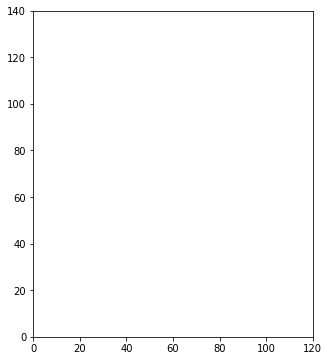

In [16]:

## create an empty list of pack
pack = []

for w in range(3):
    ## add wolf to the pack
    wf = wolf()
    pack.append(wf)
    
## iterate over 125 time steps
for d in range(125):

    ## the next 2 lines below are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))   
    
    
    ## call the roaming method and then draw  
    for w in range(np.size(pack)):
        pack[w].roaming()
        pack[w].draw()  
        
        # change wolves' energy level every day
        pack[w].set_energy(0)
     
    
    ## create a temp list
    n_pack =[]
    for k in range(np.size(pack)):
        wf2 = pack[k]
        if wf2.energ_lvl <= 0:   ## if wolf's energy <= 0, it dies
            del wf2   
        else:                    ## otherwise, it survives
            n_pack.append(wf2)

    ## replace the pack list by the survived wolves
    pack.clear
    pack = n_pack

    ## the next 5 lines below are for plotting
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)        

**How many wolf at the end?**
put the number of wolf in the cell below. (5 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "My wolf will die of hunger", and push the changes to GitHub.

---

---
- **The final piece of your wolf object is the method `prey( )`**.

This method of the `wolf` class needs to do the following:
1. Take in a sheep object as "food". 
2. Find the position of that sheep. 
3. Calculate the distance between the wolf and that sheep. You can use the formula to calculate distance: $dst = \sqrt{ (w_x-s_x)^2 + (w_y-s_y)^2 }$, where ($w_x,w_y$) and ($s_x,s_y$) are the positions of wolf and sheep, respectively. 
4. If the distance is shorter than 5, the wolf catches the sheep. Return catch = 1. 
5. If the distance is longer than 5, return catch = 0.

### <font color='blue'>This one will be the final functioning wolf class.</font>

In [ ]:
### copy your wolf object here 
### add prey( ) to this class (10 pt)






---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Done with wolf object", and push the changes to GitHub.

---

---
## Part 4. Assemble the prairie

Now, we have sheep and wolf objects all done. The code below puts all ingradients together to simulate the population evolution on the prairie. **Read through the code and understand what it is doing.**  If your sheep and wolf objects are functioning properly, the code below should run fine.

In [ ]:
### Let's start with 40 sheeps and 5 wolves

## flock list that contains sheeps
flock = []
for i in range(40):
    flock.append(sheep())
    
## pack list that contains wolves    
pack = []
for i in range(5):
    pack.append(wolf())

## create a background of the prairie    
pri = np.zeros([140,120,3])
pri[:,:,1] = 1

## the periods of sheep and wolf reproduce
sh_bp = 100
wf_bp = 120

count = 0

## solution
wf_plr = []
sh_plr = []
## solution

## iteration over 2001 days
for d in range(2,2002):     
    
    
    ## wolf roaming
    for w in range(np.size(pack)):
        wf = pack[w]
        wf.roaming()

    ## a temp list of sheep
    n_flock = []
    ## loop over each sheep    
    for i in range(np.size(flock)): 
        sp = flock[i]
        sp.roaming()     

        ## check whether there are wolves around
        for w in range(np.size(pack)):
            wf = pack[w] 
            catch = wf.prey(sp)      
            ## wolf eats sheep and gets energy
            if catch == 1:
                wf.set_energy(catch)
                break
        
        ## if caught by a wolf, the sheep is killed
        if catch == 1:
            del sp
        else:
            n_flock.append(sp)
    
    ## replace old flock list with surviving sheeps
    flock.clear
    flock = n_flock 
    
    ## sheep reproduce
    if np.mod(d,sh_bp) == 1:
        for j in range(np.size(flock)):
            kid = flock[j].reproduce()
            flock.append(kid)
 
    ## wolf energy decay every day                
    for w in range(np.size(pack)):
        wf = pack[w] 
        wf.set_energy(0)
        
        
    ## a temp list of sheep    
    n_pack =[]
    for w in range(np.size(pack)):
        wf = pack[w]
        ## wolf energy too low, it dies
        if wf.energ_lvl <= 0:
            del wf
        else:
            n_pack.append(wf)
            
    ## replace old pack list with surviving pack
    pack.clear
    pack = n_pack

    ## wolf reproduce
    if np.mod(d,wf_bp) == 1:
        for w in range(np.size(pack)):
            pup = pack[w].reproduce()
            pack.append(pup)
    

    
    
    
            
    ## the next 4 lines are used to set up a stop point
    ## the simulation will stop 210 steps after one of 
    ## the two species extinct
    if np.size(pack) == 0 or np.size(flock) == 0:
        count = count +1       
    if count == 210:
        break           
           
    ## visualization: plot every 10 time steps       
    if np.mod(d,10) == 1:
        clear_output(wait=True)  

        plt.figure(figsize=(6, 6))
        plt.imshow(pri)
    
        for w in range(np.size(pack)):
            pack[w].draw()

        for s in range(np.size(flock)):  
            flock[s].draw()       

        plt.axes().set_aspect('equal')
        plt.axes().set_xlim([-0,120])
        plt.axes().set_ylim([-0,140])
        plt.show()   

        time.sleep(0.001)   
        
        print('At', d,'day,',  '  There are ', np.size(flock), 'sheep.', \
              '  There are ', np.size(pack), 'wolf.')
        

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "My code can run well", and push the changes to GitHub.

---

---
## Part 5. Observing population evolution. (20 pt)

- **You need to add a few lines of code to the prairie code above to record the sheep and wolf population over time.**
- run the simulation at least five times. Plot the populations over time for each of those simulations. Your plot should look similar to the one at the top of the notebook.

In [ ]:
### your code to show the population evolution





- **Summarize the observations in your words.** Is there a correlation between the populations of these two species? What is it? (10 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

- **If the sheep reproduction rate is lower (set sp_bp = 200 in Line18, meaning sheep can only reproduce every 200 days), what do you expect to happen in the popularion evolution?** (5 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer  here.

- **Test it on the simulations. What do you observe?** (5 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

- **If the wolf reproduction rate is higher (set wf_bp = 60 in Line19, meaning wolf can  reproduce every 60 days), what do you expect to happen in the popularion evolution?** (5 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

- **Test it on the simulations. What do you observe?** (5 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

---
## Part 6. Possible improvement. (10 pt)

- **Think about what more can be added into the model to make the animal behavior more realistic.** List at least three more attributes or methods that can be included to the sheep or wolf objects to reflect animal behavior more realisitic. Describe what those attributes or methods will do, and how you would implement them in the class. (10 pt)

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Assignment complete", and push the changes to GitHub.

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFURTU1NUUxWUFYNEhKN0tJSU1RTlFWU0E4Sy4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload it there.

&#169; Copyright 2020,  Department of Computational Mathematics, Science and Engineering at Michigan State University